**Assignment 5:** Create a CNN for CIFAR-10.

*Explanation:* Implement Conv2D, MaxPooling2D, and Flatten layers to build an image classifier.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 86ms/step - accuracy: 0.3363 - loss: 1.7973 - val_accuracy: 0.5126 - val_loss: 1.3276
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.5553 - loss: 1.2426 - val_accuracy: 0.5946 - val_loss: 1.1339
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.6259 - loss: 1.0577 - val_accuracy: 0.6466 - val_loss: 0.9971
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.6690 - loss: 0.9463 - val_accuracy: 0.6669 - val_loss: 0.9550
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.6889 - loss: 0.8839 - val_accuracy: 0.6811 - val_loss: 0.9114
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.7200 - loss: 0.8042 - val_accuracy: 0.6948 - val_loss: 0.8745
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.7356 - loss: 0.7612 - val_accuracy: 0.7086 - val_loss: 0.8346
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.7520 - loss: 0.7166 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7118 - loss: 0.8505

✅ Final Test Accuracy: 0.7082
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


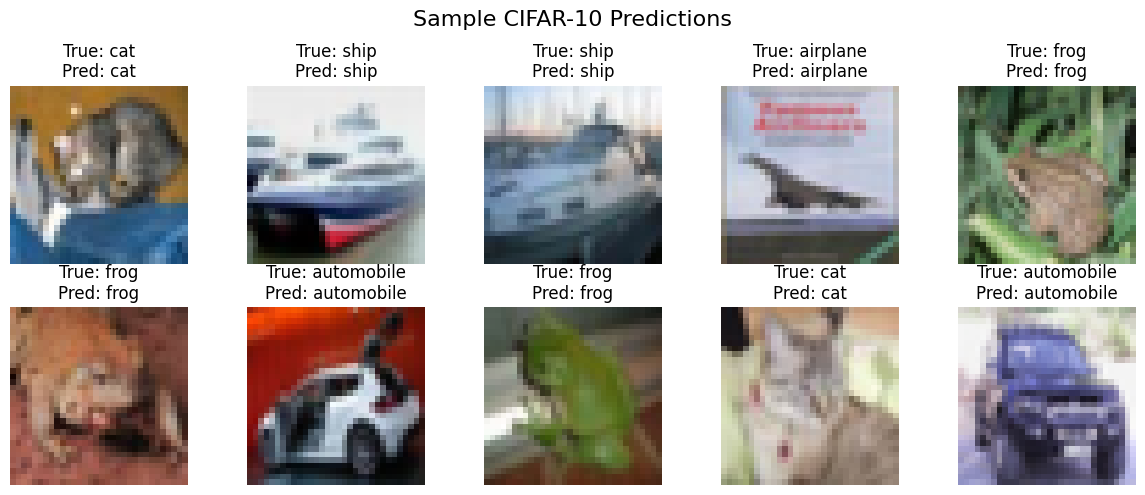

In [1]:
# Install TensorFlow (if not already)
# !pip install tensorflow

# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset (60K color images, 32x32, 10 classes)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class labels for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Build a simple CNN using Sequential API
model = Sequential([
    # First convolutional layer + max pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer + max pooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third convolutional layer
    Conv2D(64, (3, 3), activation='relu'),

    # Flatten and add dense layers
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the CNN model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the CNN
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test_cat))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("CNN Accuracy on CIFAR-10")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")

# Predict labels for test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Show 10 sample predictions with images
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    true_label = class_names[y_test[i][0]]
    pred_label = class_names[predicted_labels[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.suptitle("Sample CIFAR-10 Predictions", fontsize=16)
plt.tight_layout()
plt.show()
